# Which setup do we prefer for production?

We tried to raise surface and air temperatures while keeping relative humidity the same (raising specific humidity). Everything else should be left unchanged. The change in air density however led to mass loss at the simulation boundaries, resulting in a fast drop in surface pressure with pressure waves crossing the domain. To avoid this mass loss we adjusted the cell pressure to keep air density unchanged while changing the temperature. This adjustment inhibits the surface pressure drop upon simulation start-up.



## What setups do we have?

The base changes were applied to temperature and specific humidity:

- We changed temperature applying a change profile (*delta*) that is the difference between two moist adiabatic profiles. These profiles were extrapolated from two surface temperatures being 4 kelvin apart. This means 4 kelvin higher temperatures at the surface and even higher differences in higher altitudes (roughly doubled at 12km), but no changes above the tropopause.

- We raised specific humidity to mimic the relative humidity we had prior to changing the temperature.

This describes our first setup which in this notebook is called **p-fix**.

After startup we saw a drop in surface pressure. We realised that by these changes we had implicitly changed air density. ICON grid cells have a fixed volume. In such a fixed volume, an increase in temperature with no change in air pressure can only mean lower air density. To account for this we *restored* density in a similar fashion as we *restored* relative humidity:

- After the above changes we adjusted pressure to mimic the air density we had prior to changing the temperature.

This adjusted setup is called **rho-fix** in this notebook.

## Summary for Policymakers

| Criterium | *p-fix* | *rho-fix* |
|---------------|-------------------------------|-----------------------------------|
| **Temperature and RH profile**      | ✅ The applied profiles are conserved throughout the run | ✅ *same* |
| **Surface winds**      | 🆗 Same mean value as control simulation, **broader distribution** | ✅ More **similar to control** simulation |
| **Surface pressure** | ❌ Fast drop (2h) to around **20hPa lower** than control | 🆗 Rise to around **8hPa higher** than control |
| **Surface fluxess** | ❌ Around **50% higher** | ✅ Around **25% higher**. Fits expectation. |

## Things that should be the same

Ideally we would increase temperature and specific humidity and everything else would be left unchanged. This holds true for the relative humidity throughout the run.

In [13]:
# this is a work around for relative image paths not working both 
# locally and on the github representation of the notebook
import IPython.display
def display(path): return IPython.display.Image(filename=path)

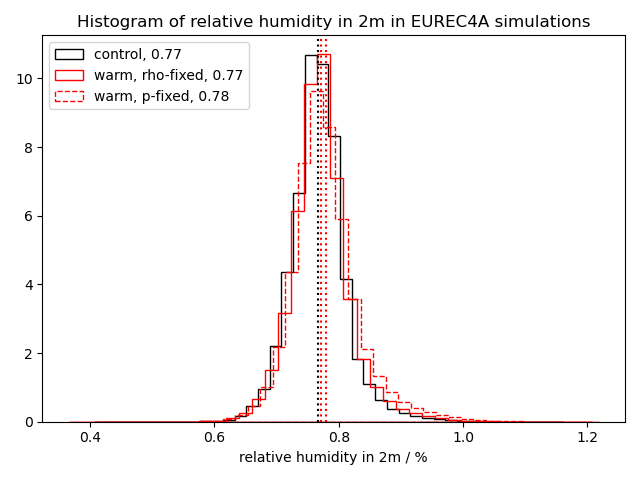

In [14]:
display("img/fig_histogram_variable_2ddata_cut_rh_2m.png")

In our first warming setup *p-fix* mass (= surface pressure) was lost shortly after start-up. The adjusted setup does not experience mass loss, but instead has higher surface pressure than the control simulation. The origin of this additional surface pressure is not clear. The increase in water vapour does not explain a surface pressure increase of that magnitude.

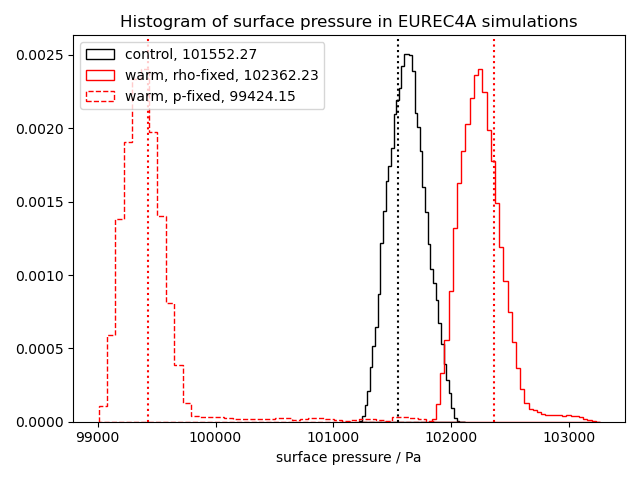

In [5]:
display("img/fig_histogram_variable_2ddata_cut_pres_sfc.png")

One of the aims of having a purely thermodynamic forcing was to look at the thermodynamic effects separate from the dynamic effects of global warming. Therefore we do not want changes in the mean wind speed. This seems to hold, as the mean wind speed is very similar to control for both setups.

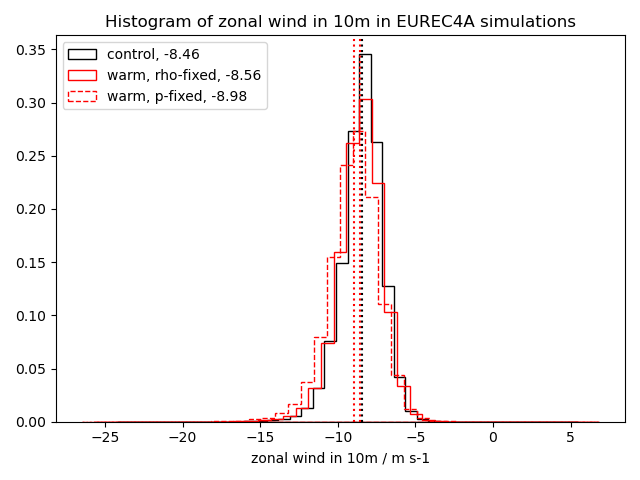

In [9]:
display("img/fig_histogram_variable_2ddata_cut_u_10m.png")

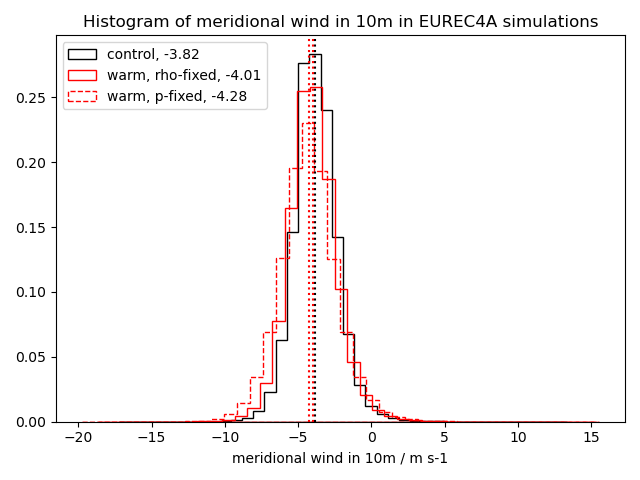

In [10]:
display("img/fig_histogram_variable_2ddata_cut_v_10m.png")

Internal circulations or SMOCs might be enhanced, leading to a broader distribution in wind speeds. If we look over the vertical velocities at the eastern boundary (integrated over time and latitude) in the different setups we notice two things: 

- There is indeed more more spread in vertical movement in the warming simulations. 
- Air entering at the boundaries (right side in the plot) moves vertically to adjust itself.

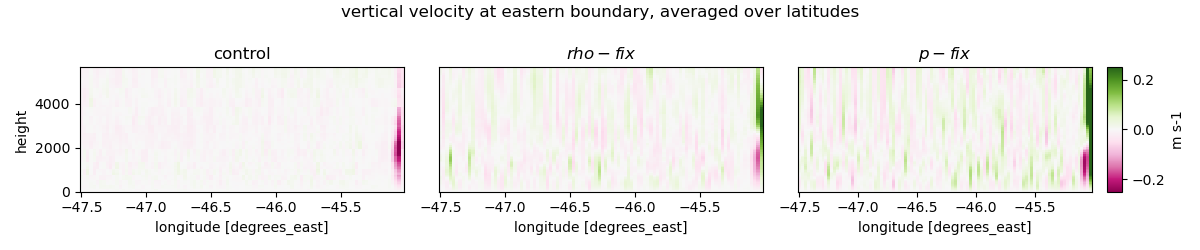

In [11]:
display('img/fixedfig_eastern_border_vertical_velocity_comparison.png')

If we compare all three simulations we notice that they are on a spectrum, with the warming setups being similar to each other and the *rho-fix* simulation being more similar to the control simulation than the *p-fix*. All simulations show adjustment at the boundaries with the least vertical movement in the control simulation and the most in the *p-fix* setup. Vertical velocity variablity is also lowest in the control simulation and highest in the *p-fix* setup.

## Things that should be different

Of course, the variables we manipulate directly (*temperature*, *specific_humidity*, *cell pressure*) should be changed in the output - and they are. As a consequence of these changes we also expect changes in the model behaviour. For some of these changes we have a clear expectation. 
The surface heat fluxes (*latent* and *sensible heat*) should change as a direct consequence of changes in temperature and humidity. I could not find out which formula ICON uses for surface fluxes, but a typical parametrisation looks like this:

\begin{equation}
Q_{LH} = \rho \cdot L_e \cdot c_e \cdot W \cdot (q_s - q_a)
\end{equation}

with the latent heat flux ($Q_{LH}$) being the product of density ($\rho$), wind strength ($W$), a turbulence coefficient ($c_e$), the latent heat of vaporisation ($L_e$) and the specific humidity gradient at the surface ($q_s - q_a$). The specific humidity gradient is the only thing that is expected to change siginificantly and we have a clear expectation on the magnitude of that change. This expectation is based on the increase in saturation specific humidity with temperature, which is roughly 7 percent per degree kelvin. The 7 percent change in both $q_s$ and $q_a$ translates to a 7 percent change in the gradient ($q_s - q_a$). And indeed we see an increase in latent heat fluxes of around $1.07^4$ for a 4 degree warmer environment for one of our setups (*rho-fixed*):

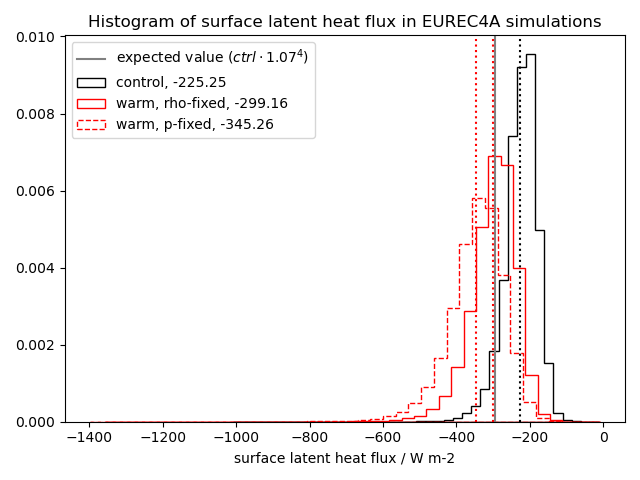

In [12]:
display("./img/fig_histogram_variable_2ddata_cut_lhfl_s_expected7.png")

The even higher values in the other setup (*p-fixed*) are probably due to higher wind speeds. Even if the mean does not differ much, *p-fixed* has a broader distribution of wind speeds.